In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.2.0
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [0]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [0]:
# Download and assign the data set using load_data()

(x_train, y_train),(x_test, y_test) = imdb.load_data()

#### Inspect the dataset

In [0]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [0]:
# Inspect the shape of the data

print(f'x_train : {x_train.shape} - y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} - y_test : {y_test.shape}')

x_train : (25000,) - y_train : (25000,)
x_test : (25000,) - y_test : (25000,)


In [0]:
# Display the first dataset element input
# Notice encoding

x_train[0]

In [0]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [0]:
# Load the dataset with defaults

imdb.load_data(path='imdb.npz', index_from=3)
# ~/.keras/dataset/

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [0]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=1000)

((array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 

In [0]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10, num_words=1000, oov_char=2)

((array([list([2, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 2, 15, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 2, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([2, 194, 2, 194, 2, 78, 228, 2, 2, 2, 2, 2, 134, 26, 2, 715, 2, 118, 2, 14, 394, 20, 13, 119, 954, 

In [0]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [0]:
 # Use '1' as the character that indicates the start of a sequence

 imdb.load_data(start_char=1)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [0]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3
imdb_word_index = {key:value + index_from for key, value in imdb_word_index.items()}

In [0]:
# Retrieve a specific word's index

imdb_word_index['india']

2853

In [0]:
# the is the most frequent word in this dataset, lets see.. index should be 4 -> start:1 + index_from:3
imdb_word_index['the']

4

In [0]:
# View an input sentence

inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [0]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [0]:
# Load the imdb data set

(x_train, y_train),(x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [0]:
# Inspect the input data shape

print(f'x_train : {x_train.shape} - y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} - y_test : {y_test.shape}')

x_train : (25000,) - y_train : (25000,)
x_test : (25000,) - y_test : (25000,)


In [0]:
# Pad the inputs to the maximum length using maxlen

from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_x_train = pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')

In [0]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [0]:
# Import numpy 

import numpy as np

In [0]:
dummy = padded_x_train[..., np.newaxis]
dummy.shape

(25000, 300, 1)

In [0]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, -1)
padded_x_train.shape

(25000, 300, 1)

In [0]:
# Create a Masking layer 

from tensorflow.keras.layers import Masking

masking_layer = Masking(mask_value=0.0)
tf_x_train = tf.convert_to_tensor(padded_x_train, dtype=tf.float32)

In [0]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [0]:
# Look at the dataset

masked_x_train[0]

In [0]:
# Look at the ._keras_mask for the dataset

# x_train._keras_mask # this will give error as it doesnot have a masking layer associated with it
masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [0]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [5]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0],[1],[5],[500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.03134368,  0.02883769, -0.01240234,  0.00213703,
          -0.03977239, -0.03458816, -0.01337875,  0.02149531,
          -0.00269903, -0.01631346, -0.04085736, -0.04141089,
          -0.04956836,  0.00480749,  0.00692384,  0.04756979]],

        [[ 0.0282212 ,  0.00452065, -0.02618203, -0.03331305,
          -0.01001449,  0.00550098,  0.04661186,  0.01645574,
           0.01555746, -0.04936639,  0.01017557,  0.03366493,
          -0.04031745, -0.04535279, -0.03385677,  0.00059921]],

        [[ 0.00884416, -0.00706162, -0.03972846, -0.03728714,
           0.0265049 ,  0.03805978,  0.03436974, -0.01371942,
          -0.04015654,  0.03135166, -0.00769504,  0.04466714,
           0.04800514, -0.01071246, -0.01061857, -0.01914454]],

        [[ 0.04161415, -0.03167405, -0.01420514, -0.01019895,
           0.02551845,  0.02015579, -0.03661138, -0.01531672,
           0.02135611, -0.0388856 ,  0.02759099, -0.01613336,
      

In [9]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-0.03134368,  0.02883769, -0.01240234, ...,  0.00480749,
         0.00692384,  0.04756979],
       [ 0.0282212 ,  0.00452065, -0.02618203, ..., -0.04535279,
        -0.03385677,  0.00059921],
       [ 0.01786529, -0.00430344, -0.03763539, ..., -0.01704401,
        -0.04259833,  0.00690252],
       ...,
       [ 0.00500028,  0.03433795, -0.03356103, ...,  0.00755165,
         0.03681955, -0.01238267],
       [ 0.03673445,  0.01314933,  0.02836232, ..., -0.00791711,
        -0.00768282, -0.02036327],
       [ 0.04161415, -0.03167405, -0.01420514, ...,  0.02921541,
        -0.04146389,  0.00117242]], dtype=float32)

In [12]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14,:]

array([ 0.02637482, -0.01683374,  0.01392516, -0.04998444, -0.03199338,
        0.01459746, -0.01448635,  0.00199107,  0.00596637,  0.00268007,
        0.03454242,  0.01176593,  0.03829548,  0.04315657, -0.01425852,
        0.0253689 ], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [0]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [14]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Load and preprocess the IMDb data

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [4]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [6]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# imdb_word_index

In [0]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}

In [0]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

#### Build an Embedding layer into a model

In [0]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())

In [0]:
# Specify an embedding dimension

embedding_dim = 16

In [0]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense, Embedding

model = Sequential([
                    Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
                    GlobalAveragePooling1D(),
                    Dense(1, activation='sigmoid')
])

In [0]:
# Functional API refresher: use the Model to build the same model
review_sequence = tf.keras.layers.Input((None,))
embedding_sequence = Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False)(review_sequence)
average_embedding = GlobalAveragePooling1D()(embedding_sequence)
positive_prob = Dense(1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positive_prob)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [0]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [37]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, 
                    validation_data=(x_test,y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 7s 8ms/step - loss: 0.6905 - accuracy: 0.5588 - val_loss: 0.6849 - val_accuracy: 0.7063
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6724 - accuracy: 0.6738 - val_loss: 0.6521 - val_accuracy: 0.6703
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6299 - accuracy: 0.7532 - val_loss: 0.6019 - val_accuracy: 0.7344
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 0.5765 - accuracy: 0.7903 - val_loss: 0.5522 - val_accuracy: 0.7797
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 0.5265 - accuracy: 0.8177 - val_loss: 0.5110 - val_accuracy: 0.7828


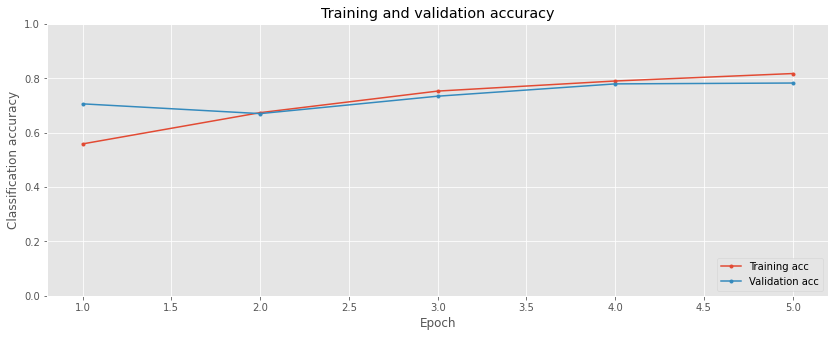

In [38]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [40]:
imdb_word_index.items()

dict_items([('woods', 1410), ('hanging', 2347), ('woody', 2291), ('arranged', 6748), ('bringing', 2340), ('wooden', 1638), ('errors', 4012), ('dialogs', 3232), ('kids', 361), ('uplifting', 5036), ('controversy', 7095), ('projection', 9880), ('stern', 7182), ('morally', 5623), ('wang', 5285), ('want', 180), ('travel', 2105), ('barbra', 6704), ('dinosaurs', 3932), ('wrong', 354), ('subplots', 4762), ('welcomed', 9094), ('butcher', 6705), ('fit', 1182), ('screaming', 1929), ('fix', 4289), ('hurting', 9656), ('effects', 301), ('barton', 8777), ('ingrid', 6194), ('adapt', 7918), ('disturbed', 4013), ('purpose', 1287), ('olds', 6794), ('needed', 886), ('master', 1299), ('positively', 5401), ('zatoichi', 9838), ('feeling', 546), ('affairs', 5624), ('wholesome', 7801), ('cinematic', 1359), ('tech', 4990), ('saying', 659), ('padded', 8424), ('tempted', 5747), ('plate', 7478), ('altogether', 3901), ('lds', 8778), ('nicely', 1779), ('mummy', 4590), ('lots', 774), ('lotr', 9261), ('irs', 9881), ('

In [50]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]
weights[1410]

array([-0.33772385, -0.32283682, -0.30148807,  0.29374477, -0.3530176 ,
       -0.35722908,  0.36438948,  0.32457116, -0.35727867,  0.24891223,
       -0.2778698 ,  0.27850544, -0.34095383,  0.3543165 ,  0.31236112,
        0.26581964], dtype=float32)

In [0]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
import os
# from os import path
path = '/content/drive/My Drive/INSAID/TensorFlow/Customizing your models with Tensorflow 2/Week3/notebooks/data'
out_v = io.open(os.path.join(path, 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(os.path.join(path, 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [0]:
# Create a SimpleRNN layer and test it

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [26]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1.,1.],[2.,2.],[3.,3,]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-0.44547433, -0.97158545, -0.4433751 , -0.14694378,  0.9763861 ,
         0.36764356, -0.79583883,  0.36726075, -0.22122918,  0.2924804 ,
        -0.8558613 ,  0.97894424,  0.56987303,  0.7422852 , -0.9074044 ,
         0.64631605]], dtype=float32)>

In [27]:
sequence

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[1., 1.],
        [2., 2.],
        [3., 3.]]], dtype=float32)>

In [37]:
import numpy as np
inputs = np.random.random([32, 10, 8]).astype(np.float32)
simple_rnn = tf.keras.layers.SimpleRNN(4)

output = simple_rnn(inputs)  # The output has shape `[32, 4]`.
print(output.shape)

simple_rnn = tf.keras.layers.SimpleRNN(
    4, return_sequences=True, return_state=True)

# whole_sequence_output has shape `[32, 10, 4]`.
# final_state has shape `[32, 4]`.
whole_sequence_output, final_state = simple_rnn(inputs)
print(whole_sequence_output.shape)
print(final_state.shape)
inputs.shape

(32, 4)
(32, 10, 4)
(32, 4)


(32, 10, 8)

#### Load and transform the IMDB review sentiment dataset

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [0]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [0]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [0]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [0]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.LSTM(units=16),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [0]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [47]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=3, batch_size=32)

Epoch 1/3
782/782 [==============================] - 402s 514ms/step - loss: 0.1419 - accuracy: 0.9505 - val_loss: 0.3390 - val_accuracy: 0.8778
Epoch 2/3
782/782 [==============================] - 388s 496ms/step - loss: 0.1234 - accuracy: 0.9576 - val_loss: 0.3833 - val_accuracy: 0.8771
Epoch 3/3
782/782 [==============================] - 386s 494ms/step - loss: 0.0976 - accuracy: 0.9683 - val_loss: 0.3676 - val_accuracy: 0.8774


#### Plot learning curves

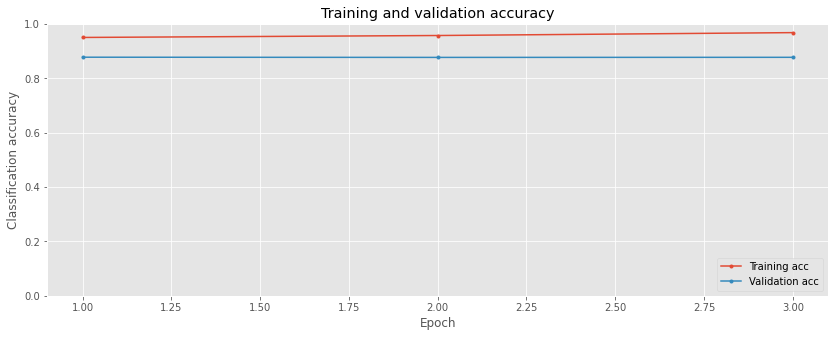

In [48]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [49]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}
print([inv_imdb_word_index[index] for index in x_test[0] if index>2])

['ignore', 'the', 'bad', 'reviews', 'on', 'here', 'this', 'film', 'is', 'awesome', 'just', 'before', 'dawn', 'is', 'a', 'great', 'example', 'of', 'what', 'can', 'be', 'done', 'in', 'a', 'film', 'with', 'a', 'minimal', 'budget', 'if', 'you', 'have', 'a', 'dedicated', 'crew', 'decent', 'script', 'and', 'a', 'cool', 'idea', 'for', 'a', 'film', "it's", 'a', 'hell', 'of', 'a', 'lot', 'of', 'fun', 'br', 'br', 'i', 'enjoyed', 'it', 'a', 'lot', 'more', 'than', 'most', 'other', "80's", 'slashers', 'because', 'the', 'killer', 'is', 'so', 'unique', 'wrong', 'turn', 'ripped', 'this', 'movie', 'off', 'something', 'fierce', "there's", 'plenty', 'of', 'blood', 'and', 'scares', 'my', 'girlfriend', 'was', 'freaked', 'out', 'and', 'she', 'watches', 'almost', 'everything', 'with', 'me', 'and', "doesn't", "it's", 'got', 'that', 'creepiness', 'to', 'it', 'br', 'br', "i'd", 'say', 'that', 'just', 'before', 'dawn', 'is', 'the', 'best', 'early', "80's", 'slasher', 'out', 'there', 'i', 'really', 'enjoyed', 'it

In [51]:
# Get the model prediction using model.predict()
print('predict for : ', x_test[None, 0, :])
pred = model.predict(x_test[None, 0, :])
print(f'predicted {pred}')

predict for :  [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1 2753    3   77  856   22  132   13   21    8 1189
    42  158 3421    8    5   86  462    6   50   69   29  223   10    5
    21   18    5 3721  351   47   24   27    5 4326 1050  541  228    4
     5  645  325   17    5   21   44    5  608    6    5  175    6  252
     9    9   12  509   11    5  175   52   73   90   84 1354 7415   87
     3  454    8   37  954  354  470 3313   13   

In [52]:
# Get the corresponding label

print(f'actual label : {y_test[0]}')

actual label : 1


---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [0]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [0]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(5000)

#### Build stacked and bidirectional recurrent models

In [0]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [0]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                                    tf.keras.layers.LSTM(units=32, return_sequences=True),
                                    tf.keras.layers.LSTM(units=32, return_sequences=False),
                                    tf.keras.layers.Dense(1, activation='sigmoid')                             
])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          80016     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          6272      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 94,641
Trainable params: 94,641
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                                    tf.keras.layers.Bidirectional(layer = tf.keras.layers.LSTM(units=32), merge_mode='sum',
                                                                  backward_layer=tf.keras.layers.GRU(units=32, go_backwards=True)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')                             
])

for layer in model.layers:
    print(layer)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          80016     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                11072     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 91,121
Trainable params: 91,121
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                                    tf.keras.layers.Bidirectional(layer = tf.keras.layers.LSTM(units=32, return_sequences=True), 
                                                                  merge_mode='concat'),
                                    tf.keras.layers.GRU(units=8, return_sequences=False),
                                    tf.keras.layers.Dense(1, activation='sigmoid')                             
])
for layer in model.layers:
    print(layer)
print("\n")    
model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 16)          80016     
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 64)          12544     
_________________________________________________________________
gru_6 (GRU)                  (None, 8)                 1776      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 94,345
Trainable params: 94,345
Non-trainable params: 0
_________________________________________________________________


#### Compile and fit the model

In [0]:
# Compile the model

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [77]:
# Train the model, saving its history
history={}
with tf.device('GPU:0'):
    history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test,y_test))

Epoch 1/3
391/391 [==============================] - 591s 2s/step - loss: 0.3968 - accuracy: 0.8075 - val_loss: 0.2734 - val_accuracy: 0.8904
Epoch 2/3
391/391 [==============================] - 583s 1s/step - loss: 0.2553 - accuracy: 0.9002 - val_loss: 0.2780 - val_accuracy: 0.8866
Epoch 3/3
391/391 [==============================] - 577s 1s/step - loss: 0.2067 - accuracy: 0.9222 - val_loss: 0.3134 - val_accuracy: 0.8776


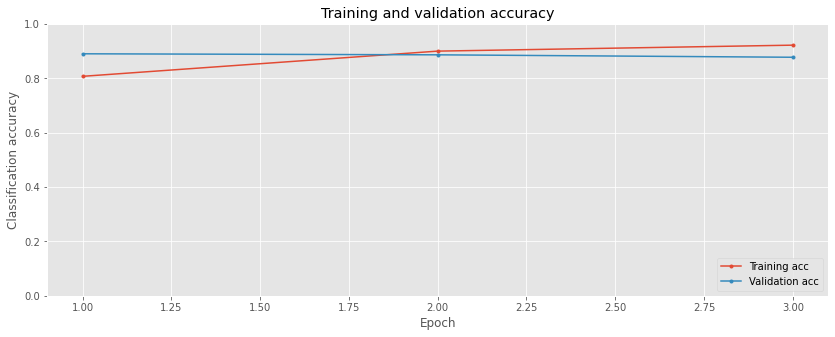

In [78]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);